In [12]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

In [13]:
image_file = "/content/test_img2.png"
img = cv2.imread(image_file)

In [14]:
def display(img):
    dpi = 80
    im_data = img

    height, width  = im_data.shape[:2]

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()


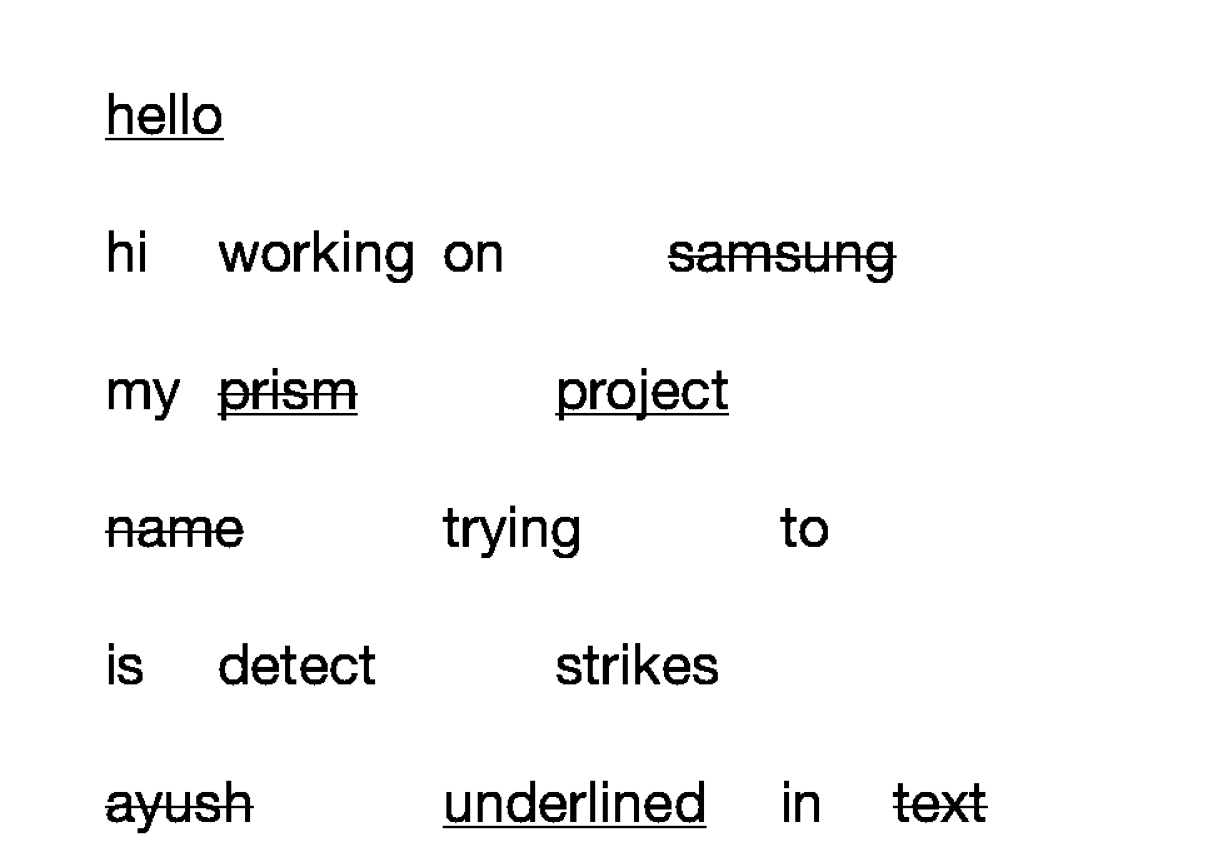

In [15]:
## Preprocessing:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = 175
binary_image = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# im_bin = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
display(binary_image)

In [16]:
np.unique(binary_image)


array([  0, 255], dtype=uint8)

In [17]:
import cv2


def preProcessing(myImage):
    grayImg = cv2.cvtColor(myImage, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(grayImg, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    print(f'The threshold valua applied to the image is: {ret} ')
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
    dilation = cv2.dilate(thresh1, horizontal_kernel, iterations=1)
    horizontal_contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    im2 = myImage.copy()
    for cnt in horizontal_contours:
        x, y, w, h = cv2.boundingRect(cnt)
        rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (255, 255, 255), 0)
    im2, vertical_contours = seg_word(rect)
    return im2, vertical_contours


def seg_word(wordImage):
    grayImg = cv2.cvtColor(wordImage, cv2.COLOR_BGR2GRAY)
    ret, thresh2 = cv2.threshold(grayImg, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    # create a Structuring Element size of 8*10 for the vertical contouring
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 10))
    # apply Dilation for once only
    dilation = cv2.dilate(thresh2, vertical_kernel, iterations=1)
    #fingd the vertical contours
    vertical_contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    word_img = wordImage.copy()
    # Run through each contour and extract the bounding box
    for cnt in vertical_contours:
        #computes the minimum rectangle
        x, y, w, h = cv2.boundingRect(cnt)
        # Draw a rectangular from the top left to the bottom right with the
        # given Coordinates x,y and height and width
        rect = cv2.rectangle(word_img, (x, y), (x + w, y + h), (0, 255, 0), 0)
    # apply a Character Segmentation and return the output Image

    return word_img, vertical_contours

The threshold valua applied to the image is: 133.0 


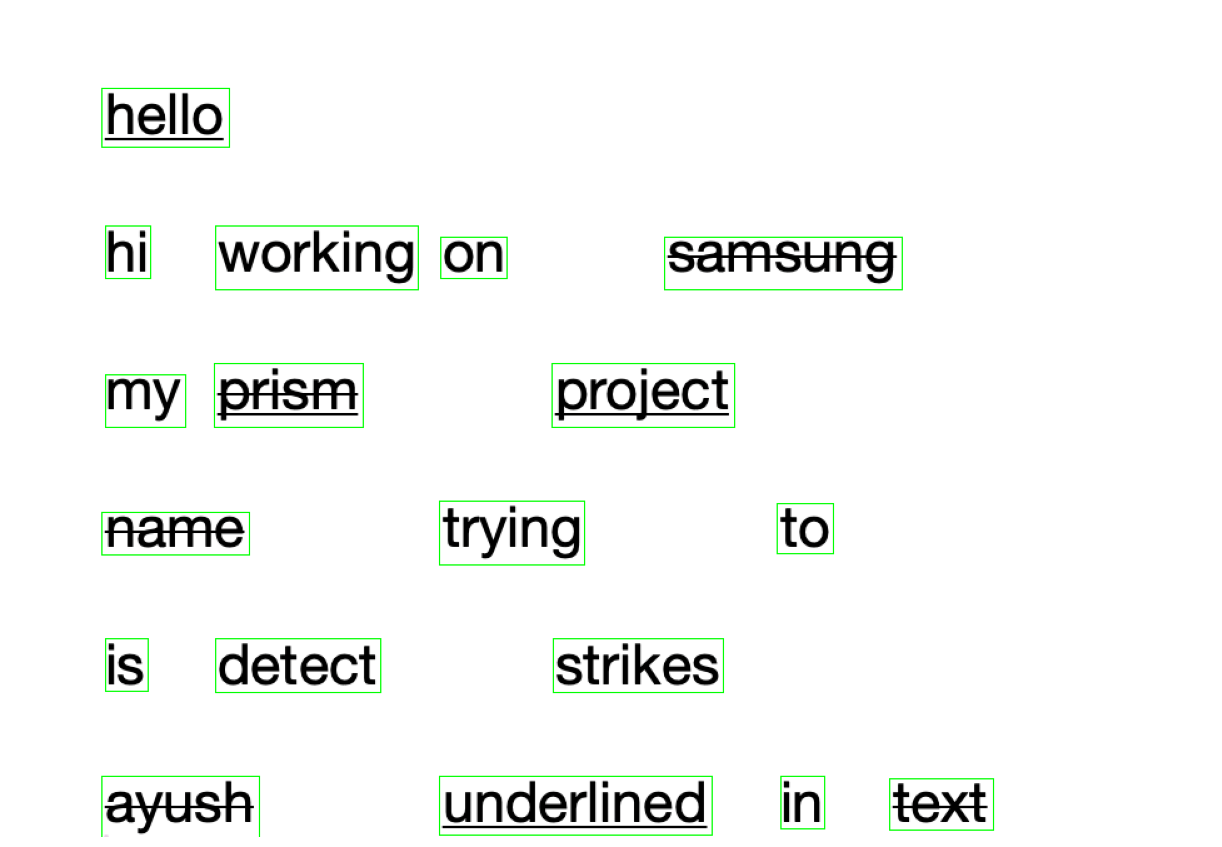

In [18]:
## segmentation
image = cv2.imread(image_file)
im2, vertical_contours = preProcessing(image)

display(im2)

In [19]:
bbox = []
for cnt in vertical_contours:
        #computes the minimum rectangle
        x, y, w, h = cv2.boundingRect(cnt)

        bbox.append([x,y,w,h])

In [20]:
bbox = sorted(bbox, key = lambda x: (x[0], x[1]) )

In [21]:
bbox

[[73, 63, 102, 47],
 [73, 402, 118, 34],
 [73, 613, 126, 49],
 [76, 173, 36, 42],
 [76, 292, 64, 42],
 [76, 503, 34, 42],
 [163, 283, 119, 51],
 [164, 173, 162, 51],
 [164, 503, 132, 43],
 [343, 393, 116, 51],
 [343, 613, 218, 47],
 [344, 182, 53, 33],
 [433, 283, 146, 51],
 [434, 503, 136, 43],
 [523, 182, 190, 42],
 [613, 395, 45, 40],
 [616, 613, 35, 42],
 [703, 615, 83, 41]]

In [22]:
def detect_horizontal_line(word, x, y, w, h):
    arr = [0, 0]  # Initialize the array outside the loop

    for i in range(h):
        count = 0

        for j in range(w):
            if word[i][j] == 0:
                count += 1

        if count / w > 0.75:
            if i / h > 0.75:
                arr[1] = 1
            elif i / h < 0.75:
                arr[0] = 1

    print("in function")
    print(arr)
    return arr



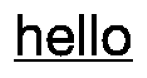

in function
[0, 1]
[0, 1]


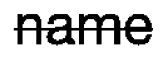

in function
[1, 0]
[1, 0]


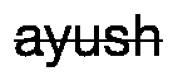

in function
[1, 0]
[1, 0]


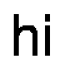

in function
[0, 0]
[0, 0]


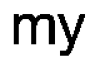

in function
[0, 0]
[0, 0]


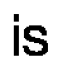

in function
[0, 0]
[0, 0]


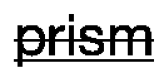

in function
[1, 1]
[1, 1]


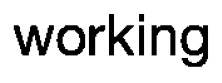

in function
[0, 0]
[0, 0]


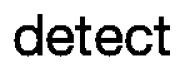

in function
[0, 0]
[0, 0]


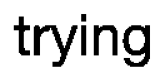

in function
[0, 0]
[0, 0]


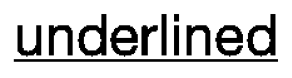

in function
[0, 1]
[0, 1]


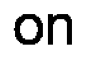

in function
[0, 0]
[0, 0]


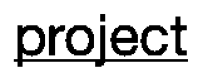

in function
[0, 1]
[0, 1]


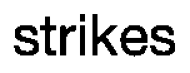

in function
[0, 0]
[0, 0]


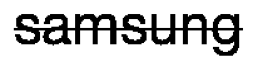

in function
[1, 0]
[1, 0]


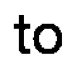

in function
[0, 0]
[0, 0]


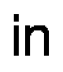

in function
[0, 0]
[0, 0]


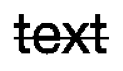

in function
[1, 0]
[1, 0]


In [23]:
# Iterate through each bbox : ideally each box should contain only one word
words = []
underline_words = []
strike_words = []
both = []

for word_dim in bbox:
    x, y, w, h = word_dim[0],word_dim[1], word_dim[2],word_dim[3]
    word = binary_image[y:y+h, x:x+w]
    display(word)
    z = detect_horizontal_line(word, x,y,w,h)
    print(z)
    if(z[0] == 1):
        strike_words.append(word)
    if(z[1] == 1):
      underline_words.append(word)
    if((z[0] == 1) and (z[1]==1)):
      both.append(word)
    words.append(word)

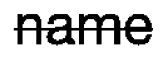

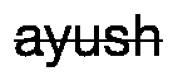

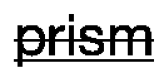

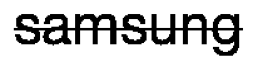

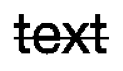

In [24]:
for i in range(len(strike_words)):
    display(strike_words[i])



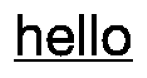

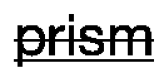

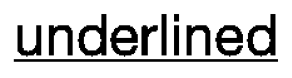

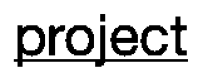

In [25]:
for i in range(len(underline_words)):
    display(underline_words[i])



In [26]:
# iterate through each word and check if there is a horizontal line

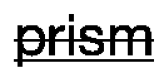

In [27]:
for i in range(len(both)):
    display(both[i])

In [ ]:
for i in range(len(words)):
    display(words[i])

In [29]:
image_file = "data/test_img1.JPG"
img = cv2.imread(image_file)

## HOUGH LINES DETECTION ALGO

In [30]:
## Preprocessing:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = 175
binary_image = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# im_bin = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
display(binary_image)
cdst = np.zeros_like(binary_image)
cdstP = np.zeros_like(binary_image)

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
image = cv2.imread(image_file)
im2, vertical_contours = preProcessing(image)

display(im2)

In [ ]:
# Edge detection
dst = cv2.Canny(binary_image, 50, 200, None, 3)

In [ ]:
lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

In [ ]:
 if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

In [ ]:
display(cdst)

In [ ]:
linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

In [ ]:
if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

In [ ]:
display(cdstP)